In [96]:
import os
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [54]:
data = {'stim_type': list(), 
        'amplitude': list(),
        'times': list(),
        'sweep': list()}

In [87]:
root_dir = '/mnt/c/Users/dsege/TEMP/Alexia/2021_12_09_C2/2021_12_09_C2/2021_12_09_C2_20Hz500ms.csv' 

filename = '2021_12_09_C2'

In [88]:
df = pd.read_csv(root_dir)

In [89]:
df

,EV_WaveN_RS1_A0,EV_ThreshT_RS1_A0,EV_ThreshY_RS1_A0,EV_PeakT_RS1_A0,EV_PeakY_RS1_A0,EV_BaseY_RS1_A0,EV_AmpY_RS1_A0
0,0,3441.7,-4.473760,3442.4,-10.65330,-1.331690,-9.32157
1,0,3534.8,-5.068700,3535.8,-9.64638,-1.932240,-7.71414
2,0,3575.0,-4.977810,3575.6,-10.43300,-1.432070,-9.00091
3,0,3607.5,-4.416650,3608.2,-9.70576,-1.292380,-8.41338
4,0,3753.6,-5.167740,3754.4,-17.78960,-1.402520,-16.38710
...,...,...,...,...,...,...,...
816,9,19229.1,-2.210830,19230.3,-3.21420,0.829616,-4.04381
817,9,19369.7,-0.066215,19370.2,-2.55783,3.129000,-5.68683
818,9,19485.4,-1.393950,19487.3,-10.27540,2.042480,-12.31790
819,9,19616.2,-5.867590,19616.8,-8.44465,-2.214410,-6.23025


In [90]:
data['stim_type'] = data['stim_type'] + ['20Hz500ms'] * df.shape[0]

In [91]:
data['sweep'] = data['sweep'] + list(df['EV_WaveN_RS1_A0'].values)

In [92]:
data['times'] = data['times'] + list(df['EV_PeakT_RS1_A0'].values)

In [93]:
data['amplitude'] = data['amplitude'] + list(df['EV_AmpY_RS1_A0'].values)

In [94]:
df_combo = pd.DataFrame(data=data)
df_combo

,stim_type,amplitude,times,sweep
0,baseline,-10.59030,1031.50,0
1,baseline,-7.38336,1109.35,0
2,baseline,-6.41348,1223.70,0
3,baseline,-14.53310,1269.15,0
4,baseline,-5.27158,1372.15,0
...,...,...,...,...
8730,20Hz500ms,-4.04381,19230.30,9
8731,20Hz500ms,-5.68683,19370.20,9
8732,20Hz500ms,-12.31790,19487.30,9
8733,20Hz500ms,-6.23025,19616.80,9


(-30.0, 0.0)

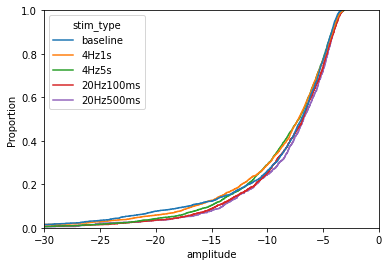

In [98]:
sns.ecdfplot(data=df_combo, x='amplitude', hue='stim_type')
plt.xlim(-30, 0)